## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv("sample_data/QueryResults (1).csv", names = ['DATE', 'TAG', 'POSTS'], header = 0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape

(2412, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df["TAG"].count()

2412

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
grouped_df = df.groupby("TAG").sum()
grouped_df.sort_values("POSTS", ascending=False)


,POSTS
TAG,
javascript,2468156
python,2094494
java,1883729
c#,1578270
php,1453393
c++,786942
r,478925
c,392287
swift,323708


In [ ]:
highest_post_count = grouped_df["POSTS"].idxmax()
print(highest_post_count)
print(grouped_df.loc[highest_post_count])

javascript
POSTS    2468156
Name: javascript, dtype: int64


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
grouped_df = df.groupby("TAG").count()
grouped_df.sort_values("DATE", ascending=True)

,DATE,POSTS
TAG,,
go,159,159
swift,166,166
r,172,172
assembly,174,174
c,174,174
c++,174,174
delphi,174,174
java,174,174
javascript,174,174


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
print(type(df["DATE"][1]))
print(df["DATE"][1])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2008-08-01 00:00:00


In [ ]:
df["DATE"] = pd.to_datetime(df["DATE"])
print(type(df["DATE"][1]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [ ]:
reshaped_df = df.pivot(index="DATE", columns = "TAG", values = "POSTS")
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1642.0,754.0,104.0,NaN,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,723.0,127.0,611.0,507.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1730.0,734.0,141.0,NaN,956.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_df.shape

(175, 14)

In [ ]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2022-09-01,191.0,1646.0,5722.0,3084.0,148.0,841.0,6235.0,14249.0,82.0,3380.0,20168.0,4020.0,474.0,1798.0
2022-10-01,242.0,2010.0,5812.0,3213.0,153.0,741.0,6501.0,14090.0,82.0,3370.0,22073.0,4530.0,436.0,1630.0
2022-11-01,288.0,2187.0,6064.0,3317.0,116.0,753.0,6813.0,14388.0,110.0,3370.0,22942.0,4636.0,466.0,1681.0
2022-12-01,284.0,1869.0,5358.0,2881.0,87.0,635.0,6016.0,12596.0,95.0,2913.0,19410.0,3695.0,397.0,1472.0
2023-01-01,254.0,1565.0,5612.0,2817.0,116.0,773.0,6074.0,12889.0,77.0,3417.0,19027.0,3835.0,381.0,1544.0


In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
reshaped_df.count()

TAG
assembly      174
c             174
c#            175
c++           174
delphi        174
go            159
java          174
javascript    174
perl          174
php           174
python        174
r             172
ruby          174
swift         166
dtype: int64

In [ ]:
reshaped_df.fillna(0, inplace = True)

In [ ]:
reshaped_df.head()


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1642.0,754.0,104.0,0.0,1129.0,634.0,130.0,476.0,536.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,723.0,127.0,611.0,507.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1730.0,734.0,141.0,0.0,956.0,580.0,97.0,500.0,450.0,1.0,158.0,0.0


In [ ]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

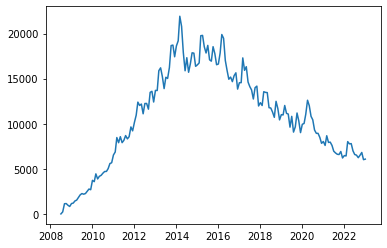

In [ ]:
plt.plot(reshaped_df.index, reshaped_df["java"])

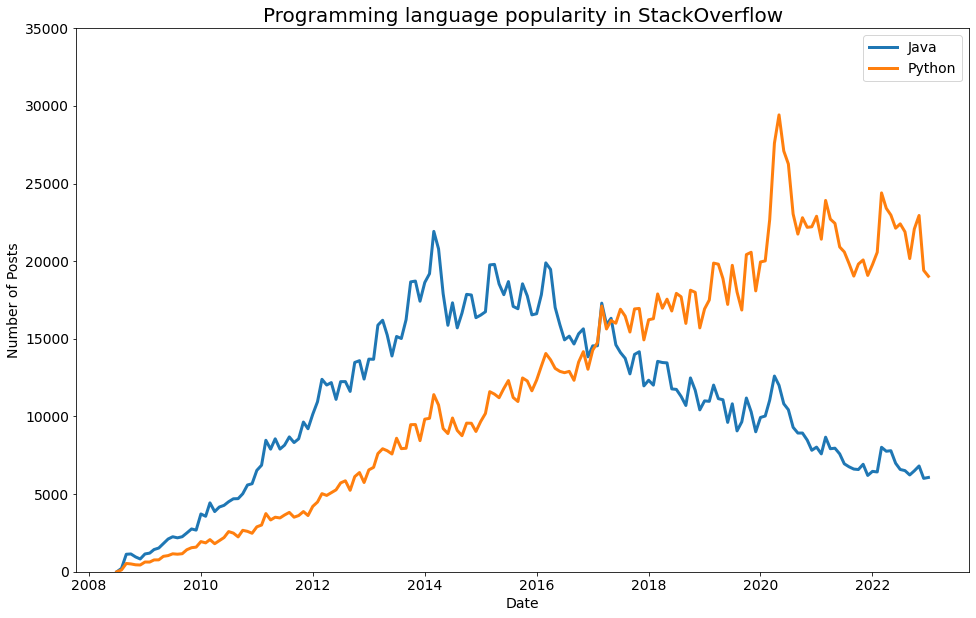

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Number of Posts", fontsize = 14)
plt.ylim(0, 35000)
plt.title("Programming language popularity in StackOverflow",fontsize = 20, loc = "center")
plt.plot(reshaped_df.index, reshaped_df["java"], linewidth = 3, label="Java")
# plt.clf() # This serves to clear the plot without closing the window
plt.plot(reshaped_df.index, reshaped_df["python"], linewidth = 3, label="Python")
plt.legend(fontsize = 14) # This method includes any labels found in the legend square


**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

<Figure size 432x288 with 0 Axes>

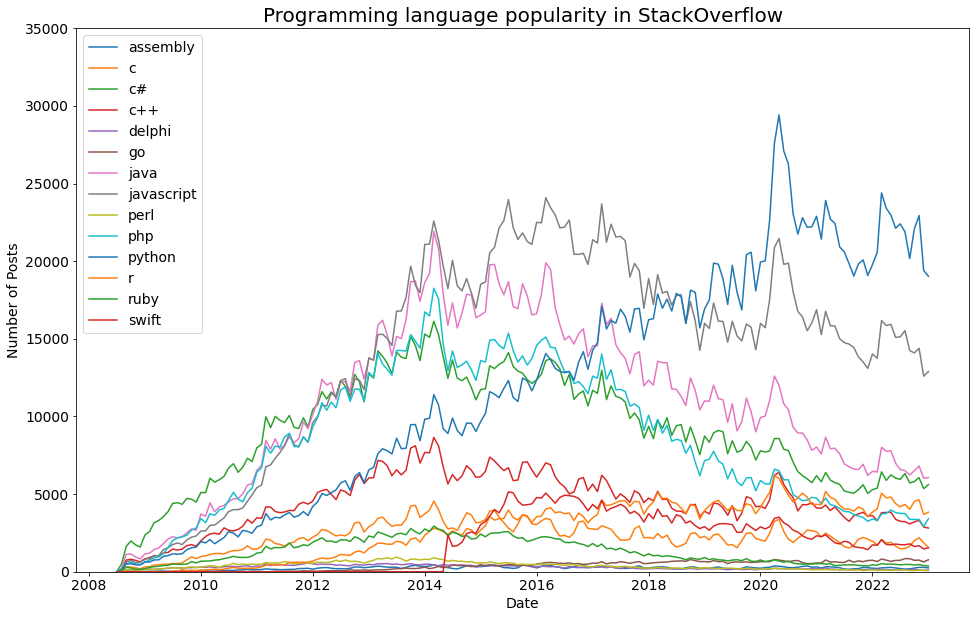

In [ ]:
plt.clf()
plt.figure(figsize=(16,10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Number of Posts", fontsize = 14)
plt.ylim(0, 35000)
plt.title("Programming language popularity in StackOverflow",fontsize = 20, loc = "center")
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], label=f"{reshaped_df[column].name}")
plt.legend(fontsize = 14)



# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [ ]:
roll_df = reshaped_df.rolling(window=4).mean()
roll_df.fillna(0, inplace = True)

<Figure size 432x288 with 0 Axes>

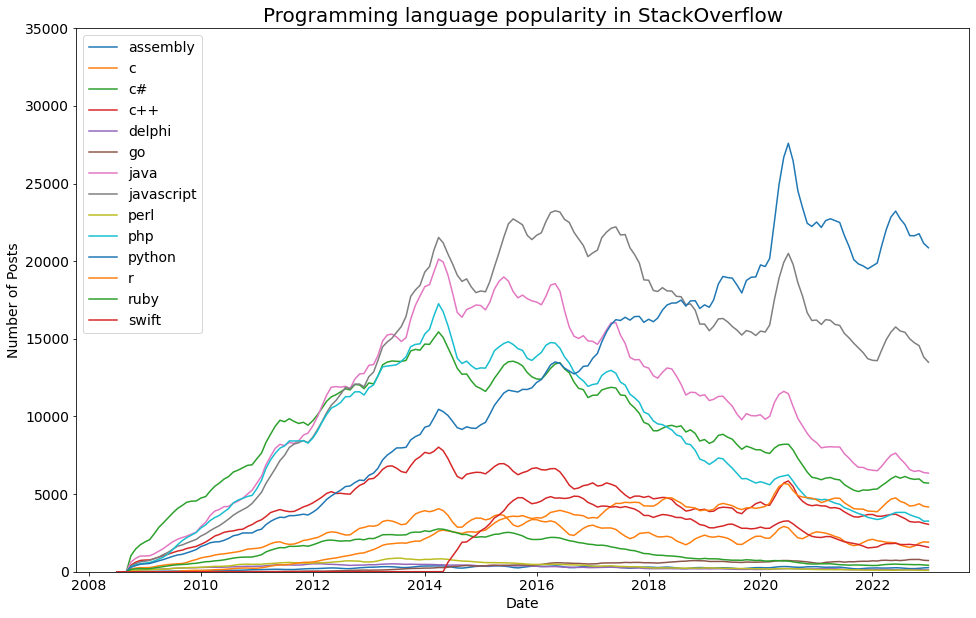

In [ ]:
plt.clf()
plt.figure(figsize=(16,10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Number of Posts", fontsize = 14)
plt.ylim(0, 35000)
plt.title("Programming language popularity in StackOverflow",fontsize = 20, loc = "center")
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], label=f"{roll_df[column].name}")
plt.legend(fontsize = 14)